# Machine Learning Models

The goal of this workbook is to compare different machine learning models on our dataset and compare their results. We are looking to see which models perform best on our dataset and which can most accurately be used to predict new data.

In this workbook we will load our cleaned csv from our ETL process, then compare the following models:
    - Logistic Regression
    - K Nearest Neighbor
    - Random Forest
    - Neural Network
    
After analyizing each of these models to see which is the best predictor, we will use a <b>Correlation Matrix</b> in order to see which of the input factors from our data has the best predictive power. This is an additional path our group wanted to go down to gain more insight into our data.
    
` While there are plenty of other machine learning models we could have explored, these are the handful that our team was most interested in experimenting with. In addition, our team selected these models as we believe they have a high likelyhood to be effective considering the nature of our dataset and predictive goals. `

In [ ]:
# Import General Dependencies for this Workbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import os

In [ ]:
# Set file path to the cleaned data csv from data cleanup process
file = "data"

# Read to a df
data_df = pd.read_csv(file)
data_df.head()

In [ ]:
print (data_df)
print (data_df.dtypes)

# ------------------------------

# Start Emerson Code

## Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

In [ ]:
# The data contains the "income", stating rather an individual earns less than $50k or more than $50k. 
# Removing the "income" from the input set in order to not provide the model with the correct answer. 
# Assign X (data) and y (target)
X = data_df.drop("income", axis=1)
y = data_df["income"]
print(X.shape, y.shape)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
# Split the data into a training (75% of values) and testing (25% of values) split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Generate the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
# Fit the model
classifier.fit(X_train, y_train)

In [ ]:
# Train the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Predict with new data

In [ ]:
# Predict the class examples
predictions = classifier.predict(X_test)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

In [ ]:
# Predict into a df
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

## K Nearest Neighbors (KNN) Model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [ ]:
# Set file path to the cleaned data csv from data cleanup process
file = "data"

# Read to a df
data_df = pd.read_csv(file)
data_df.head()

In [ ]:
# setting "y" to income 
y = data_df["income"]
target_names = ["negative", "positive"]

In [ ]:
# dropping "income" from the data as this has the correct answer 
X = data_df.drop("income", axis=1)
X.head()

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [ ]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [31]:
# Note that K: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.833


In [ ]:
# line chart 
x_values = ["KNN", "Logistic", "Randome Forrest", "Neural Network"]
y_values = [85, 80, 75, 70]
plt.xticks(rotation=75)
plt.plot(x_values,y_values, marker="o")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy per Model Type")
plt.show()

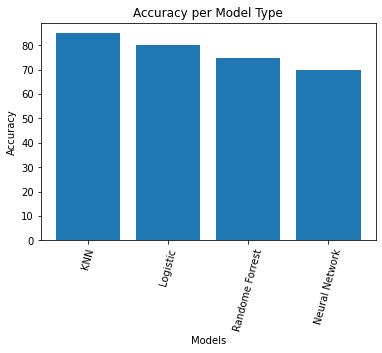

In [33]:
# bar chart 
x_values = ["KNN", "Logistic", "Randome Forrest", "Neural Network"]
y_values = [85, 80, 75, 70]
plt.xticks(rotation=75)
plt.bar(x_values,y_values)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy per Model Type")
plt.show()

# End Emerson Code

# ------------------------------

# Start Sofanit Code

## Random Forest Model

In [ ]:
#import the Random Forest Model

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import os


In [ ]:
# Set file path to the cleaned data csv from data cleanup process
file = "data"

# Read to a df
data_df = pd.read_csv(file)
data_df.head()

In [ ]:
data_df.shape

In [ ]:
target = data_df["income"]
target_names= [">=50","<=50"]
target

In [ ]:
#labelencode the target
labelencoder = LabelEncoder()
target_binary = labelencoder.fit_transform(target)
print (target_binary)

In [ ]:
data_df = data_df.drop("income", axis=1)

In [ ]:
feature_names = data_df.columns
data_df.head()

In [ ]:
data_df.shape


In [ ]:
data_binary_encoded = pd.get_dummies(data_df)
data_binary_encoded.head()

In [ ]:
#import train_test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42)
X_train.columns.to_list()


In [ ]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

       As we can see the RandomForestClassifier has about 86% of accuracy. This is a very good indicator of a good model. On the next steps, we will prioritize the features based on the importance in order to investigate which feature was the greatest indicator of income that is 
       above 50,000 dollars or below 50,000 dollars. 

In [ ]:
featuresPriority = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:

featuresPriority_df= pd.DataFrame(featuresPriority)
featuresPriority_df

In [ ]:
featuresPriority_df = featuresPriority_df.rename(columns={0:'Accuracy %' , 1:'Income Determinants'})
featuresPriority_df

In [ ]:
import plotly.express as px

fig = px.bar(featuresPriority_df, x = 'Income Determinants', y ='Accuracy %',  color =["red", "goldenrod",'#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921','blue','red'], labels={'Income Determinants', 'Accuracy %'}, title = 'Factors That Contribute To Income Greater Than Or Equal To 50,000 Dollars Per Year', 
  )
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},showlegend= False)
fig.show()

In [ ]:
featuresPriority

In [ ]:
data_binary_encoded

In [ ]:
data_df = data_df.drop(["occupation","sex","native_country","relationship"], axis=1)

In [ ]:
data_binary_encoded_2 = pd.get_dummies(data_df)
data_binary_encoded_2.head()

In [ ]:
#import train_test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded_2, target, random_state=42)
y_train[0]

In [ ]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


## Neural Network Model

In [ ]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(42)

In [ ]:
# Generate some fake data with 3 features

 from sklearn.datasets import make_classification

# X, y = data_binary_encoded                         

# y = y.reshape(-1, 1)

# print(X.shape)
# print(y.shape)

In [ ]:
#import train_test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, target, random_state=42)
X_train.columns.to_list()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Step #1 label-encode the dataset
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
X_train_scaled.shape[1]

In [ ]:
#data_binary_encoded
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
number_inputs = X_train_scaled.shape[1]
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [ ]:
 y_train_categorical.shape[1]
    

In [ ]:
X_train_scaled

In [ ]:
number_classes =  y_train_categorical.shape[1]
model.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate( X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# End Sofanit Code

# ------------------------------

## Correlation Matrix

In [ ]:
data_df.head()

In [ ]:
# Focus in on inputs more likely to cause an effect
# Ask DOM about this

#strong_inputs_df = data_df[["age", "workclass", "education", "marital_status", "occupation", "hours_per_week"]]
#strong_inputs_df

In [ ]:
# Create the correlation on the data frame
corrMatrix = data_df.corr()
#corrMatrix = strong_inputs_df.corr()
corrMatrix

In [ ]:
# Use Seaborn and Matplot to plot the correlation matrix
sn.heatmap(corrMatrix, annot=True)

plt.show()